In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from eda.eda import EDA
from data_cleaning.data_cleaner import DataCleaner

In [2]:
# Load the datasets
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
store_data = pd.read_csv('../data/store.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')


/tmp/ipykernel_4650/4150674729.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/train.csv')


In [3]:

# Initialize the DataCleaner class with store data
data_cleaner = DataCleaner(store_data)

# Get column names before cleaning
data_cleaner.get_columns(train_data)
data_cleaner.get_columns(test_data)

# Clean the train and test datasets
cleaned_train, cleaned_test = data_cleaner.clean_train_and_test(train_data, test_data)


Columns before cleaning: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Columns before cleaning: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [4]:
# Initialize the EDA class with the cleaner
# eda = EDA(cleaner=data_cleaner)
# Initialize EDA with DataCleaner and data
eda = EDA(cleaner=data_cleaner, train_data=train_data, test_data=test_data)


# Clean the data
eda.clean_data()

# Run the full EDA analysis
# eda.run_full_analysis()


Training Promo Distribution:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Test Promo Distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


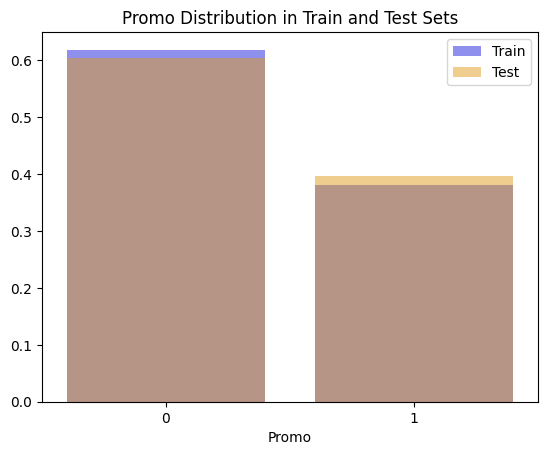

In [5]:
eda.check_promo_distribution()


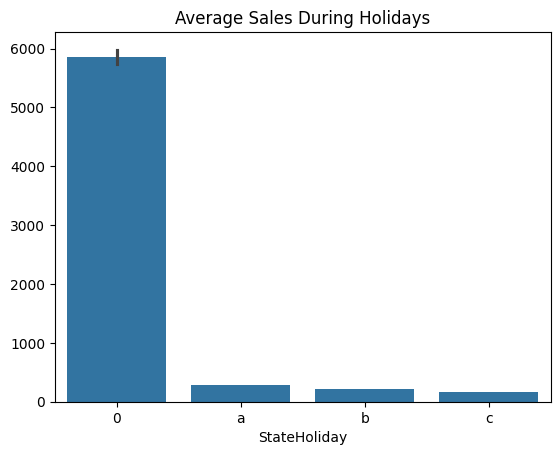

In [6]:
eda.analyze_sales_during_holidays()


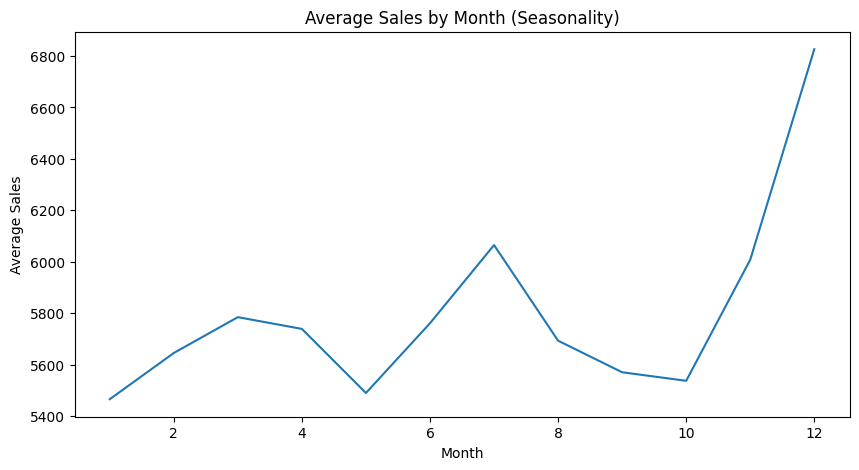

In [7]:
eda.find_seasonal_behaviors()


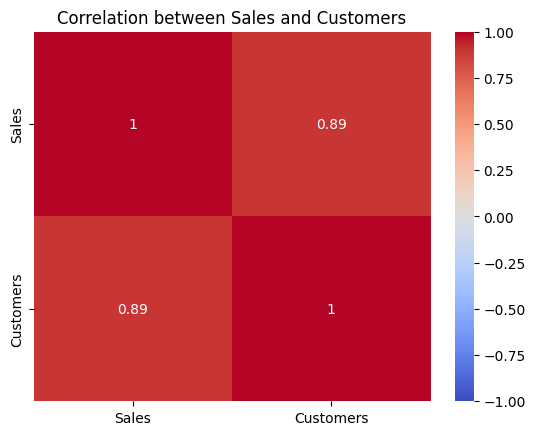

In [8]:
eda.correlation_sales_customers()


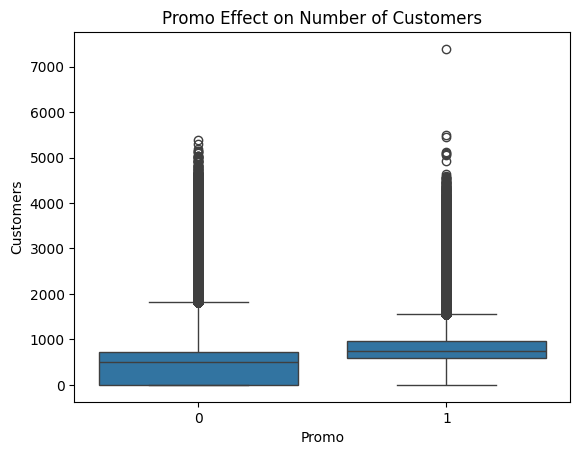

In [9]:
eda.promo_effect_on_customers()


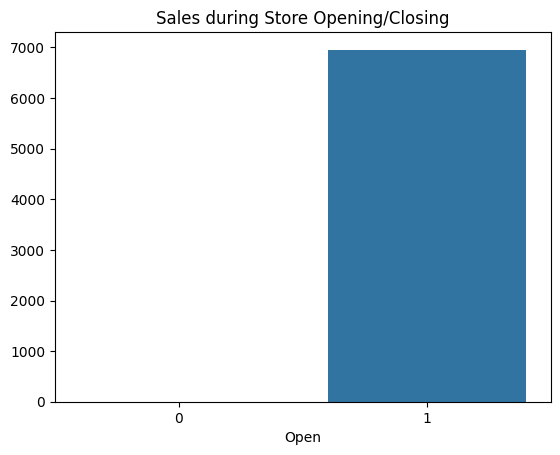

In [10]:
eda.analyze_store_openings()


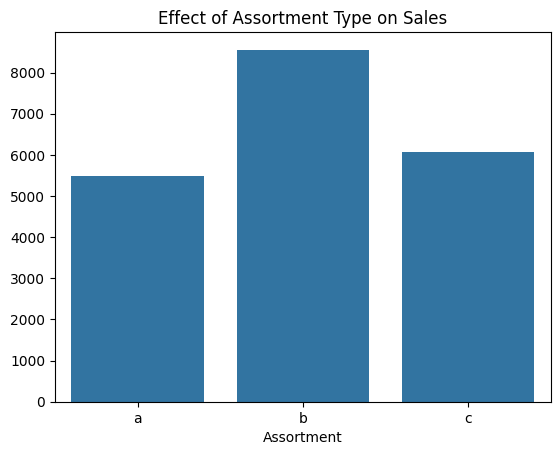

In [11]:
eda.assortment_type_sales_analysis()


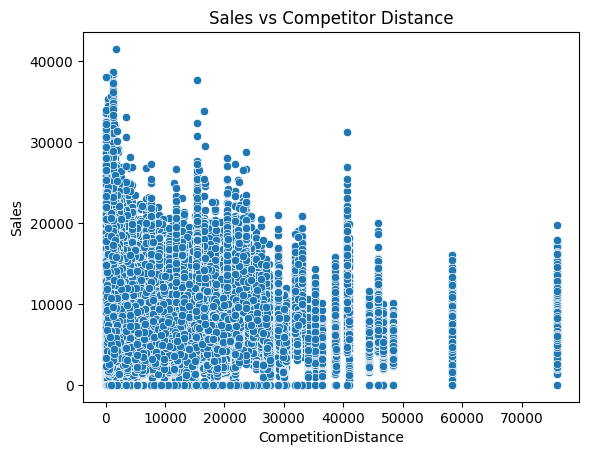

In [12]:
eda.distance_to_competitor_analysis()


In [13]:
eda.detect_and_handle_outliers()


Number of outliers detected: 23879
Data after removing outliers: (0, 19)


In [14]:
eda.handle_missing_data()



Missing data summary:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Month                        0
dtype: int64
Missing values handled using forward fill.


/mnt/d/tutorial/10x/tasks/task_4/store-sales-forecast/src/eda/eda.py:82: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.cleaned_train_data.fillna(method='ffill', inplace=True)  # Forward fill as an example


Weekday vs Weekend sales comparison


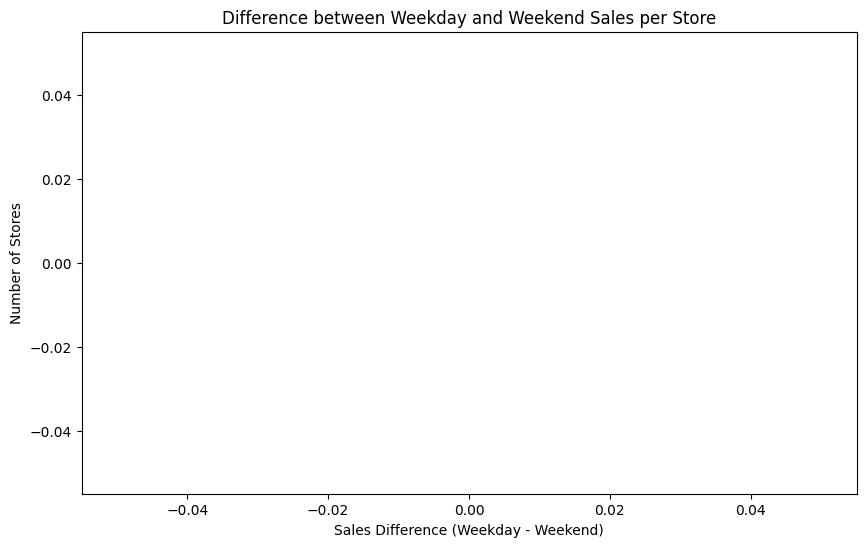

In [15]:
eda.analyze_weekday_vs_weekend_sales()


Number of stores with initially missing competitor distance: 0


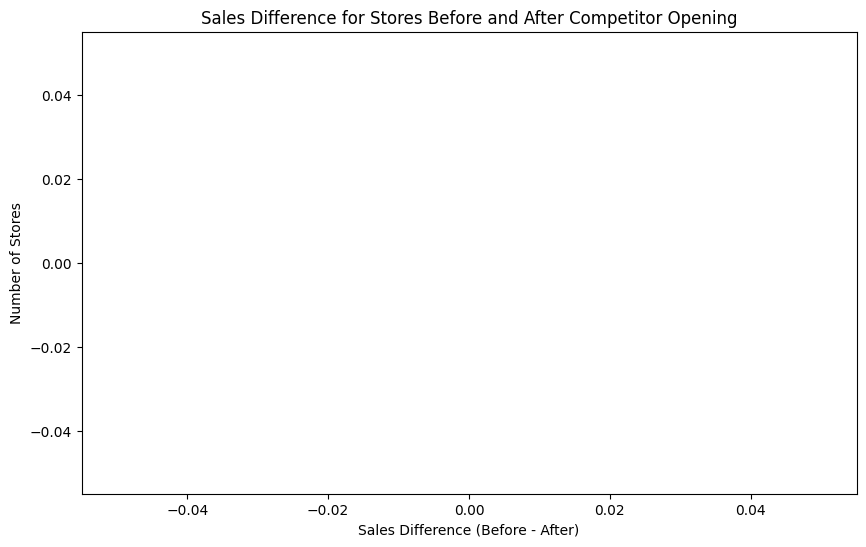

In [16]:
eda.analyze_new_competitors()


In [17]:
eda.analyze_effective_promo_deployment()



ValueError: cannot insert Store, already exists

In [18]:
eda.generate_summary()


Key Insights from EDA:
- Promo distribution is similar/different between training and test sets.
- Sales tend to increase/decrease during holidays like Christmas and Easter.
- There is a strong/weak correlation between sales and the number of customers.
- Promo seems to be attracting more/less new customers.
